In [1]:
# import warnings
# from pathlib import Path

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# data_dir = Path('../data')
# figure_dir = Path('../figures')
# figure_dir.mkdir(exist_ok=True)
# warnings.simplefilter(action='ignore', category=FutureWarning)

# district_codes = pd.read_csv(data_dir / 'district_codes_1878.csv')
# district_codes = {k: v for k, v in district_codes.itertuples(index=False)}
# institutions = pd.read_csv(data_dir / 'institutions.csv', dtype={'district': str, 'plot_number': str})

# districts_in_city = [
#     'Valli',
#     'Salakkalahti',
#     'Repola',
#     'Anina',
#     'Papula',
#     'P_Annan_kruunu',
#     'Hiekka',
#     'Pantsarlahti',
#     'Viipurin_esikaupunki',
#     'Paulovski',
#     'Havi',
#     'Saunalahti',
#     'Pietarin_esikaupunki',
# ]

# poll_tax = pd.read_csv(data_dir / 'poll_tax_register.csv', index_col=0)
# poll_tax['orthodox'] = poll_tax['orthodox'].interpolate(method='linear')
# poll_tax['in_russia_orthodox'] = poll_tax['in_russia_orthodox'].interpolate(method='linear', limit=2).fillna(0)
# poll_tax['total'] = (poll_tax.total_women + poll_tax.total_men).interpolate(method='linear')
# remove = poll_tax.in_russia_orthodox.copy()
# remove.loc['1906':] = 0
# poll_tax['orthodox'] = poll_tax.orthodox - remove
# health_council = pd.read_csv(data_dir / 'health_council.csv', index_col=0).pop_orthodox
# health_council = health_council.reindex(range(1880, 1921), fill_value=np.nan).interpolate(method='slinear')
# foreigners = pd.read_csv(data_dir / 'foreigners.csv', index_col=0).russia
# language = pd.read_csv(data_dir / 'language.csv', index_col=0).russian
# religion = pd.read_csv(data_dir / 'religion.csv', index_col=0).orthodox
# difference = health_council - poll_tax.orthodox
# data = pd.DataFrame([
#     difference,
#     poll_tax.orthodox,
#     poll_tax.in_russia_orthodox,
#     poll_tax.total,
#     health_council,
#     foreigners,
#     language,
#     religion,
# ]).T
# data.columns = [
#     'difference',
#     'register_orthodox',
#     'orthodox_in_russia',
#     'register_total',
#     'health_council_orthodox',
#     'Russian_citizens',
#     'Russian_speakers',
#     'census_orthodox',
# ]
# data.interpolate(method='linear', inplace=True)
# data.plot(marker='+', legend=True, figsize=(10, 7), ylim=(0, 25_000))
# plt.savefig(figure_dir / 'timeseries1.png')
# data.plot(marker='+', legend=True, figsize=(10, 7), ylim=(0, 4_000))
# plt.savefig(figure_dir / 'timeseries2.png')

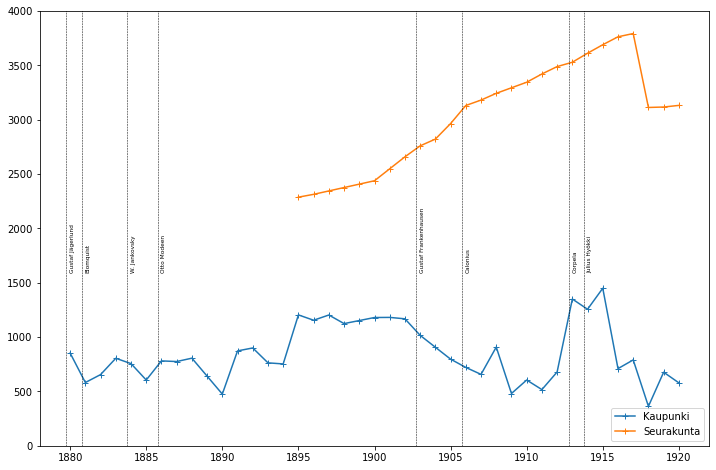

In [2]:
import warnings
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_dir = Path('../data')
figure_dir = Path('../figures')
figure_dir.mkdir(exist_ok=True)
warnings.simplefilter(action='ignore', category=FutureWarning)

district_codes = pd.read_csv(data_dir / 'district_codes_1878.csv')
district_codes = {k: v for k, v in district_codes.itertuples(index=False)}
institutions = pd.read_csv(data_dir / 'institutions.csv', dtype={'district': str, 'plot_number': str})

districts_in_city = [
    'Valli',
    'Salakkalahti',
    'Repola',
    'Anina',
    'Papula',
    'P_Annan_kruunu',
    'Hiekka',
    'Pantsarlahti',
    'Viipurin_esikaupunki',
    'Paulovski',
    'Havi',
    'Saunalahti',
    'Pietarin_esikaupunki',
]

clerks = {
    'Gustaf Jägerlund': 1880,
    'Blomquist': 1881,
    'W. Jankovsky': 1884,
    'Otto Modeen': 1886,
    'Gustaf Frankenhausen': 1903,
    'Calonius': 1906,
    'Corpela': 1913,
    'Julius Hyökki': 1914,
}
poll_tax = pd.read_csv(data_dir / 'poll_tax_register.csv', index_col=0)
poll_tax['orthodox'] = poll_tax['orthodox'].interpolate(method='linear')
poll_tax['in_russia_orthodox'] = poll_tax['in_russia_orthodox'].interpolate(method='linear', limit=2).fillna(0)
poll_tax['total'] = (poll_tax.total_women + poll_tax.total_men).interpolate(method='linear')
remove = poll_tax.in_russia_orthodox.copy()
remove.loc['1895':] = 0
poll_tax['orthodox'] = poll_tax.orthodox - remove
health_council = pd.read_csv(data_dir / 'health_council.csv', index_col=0).pop_orthodox
health_council = health_council.reindex(range(1880, 1921), fill_value=np.nan).interpolate(method='slinear')
foreigners = pd.read_csv(data_dir / 'foreigners.csv', index_col=0).russia
language = pd.read_csv(data_dir / 'language.csv', index_col=0).russian
religion = pd.read_csv(data_dir / 'religion.csv', index_col=0).orthodox
difference = health_council - poll_tax.orthodox
clerk = pd.Series({v: k for k, v in clerks.items()}, name='clerk')
data = pd.DataFrame([
    poll_tax.orthodox,
    health_council,
    clerk,
]).T
data = data.ffill()
starts = data.clerk.map(clerks)
data.columns = [
    'Kaupunki',
    'Seurakunta',
    'Henkikirjoittaja',
]
data.plot(
    marker='+',
    legend=True,
    ylim=(0, 4_000),
    figsize=(12, 8),
)
for c, y in clerks.items():
    plt.axvline(y-0.25, ymin=0, ymax=4000, color='black', ls='--', lw=0.5)
    plt.text(x=y, y=1600, s=c, rotation='vertical', fontsize='xx-small')
plt.legend()
plt.savefig(figure_dir / 'timeseries.png')

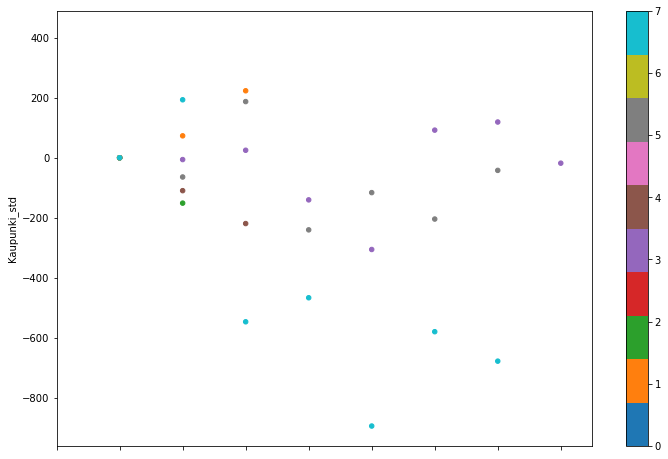

In [3]:
experience_data = data.copy()
start_level = data.Kaupunki[data.index.isin(list(clerks.values()))]
experience_data['start_level'] = start_level
experience_data = experience_data.interpolate(method='ffill')
experience_data['Kaupunki_std'] = experience_data.Kaupunki - experience_data.start_level
mapper = {v: k for k, v in enumerate(clerks)}
colors = data.Henkikirjoittaja.map(mapper)
experience = data.index.values - starts + 1
experience_data['experience'] = experience
experience_data.plot(
    kind='scatter',
    x='experience',
    y='Kaupunki_std',
    c=colors,
    cmap=plt.get_cmap('tab10'),
    figsize=(12, 8),
    xlim=(0, 8.5),
)
data.drop(columns=['Henkikirjoittaja'], inplace=True)

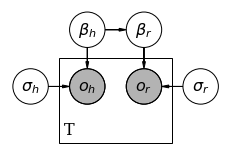

In [4]:
import daft
from matplotlib import rc

rc("font", family="serif", size=16)
scale = 1.25
pgm = daft.PGM()

pgm.add_node('health_orthodox', r'$o_{h}$', 1, 2, fixed=False, scale=scale, observed=True)
pgm.add_node('register_orthodox', r'$o_{r}$', 2, 2, fixed=False, scale=scale, observed=True)
pgm.add_node('beta_orthodox_health', r'$\beta_h$', 1, 3, fixed=False, scale=scale, observed=False)
pgm.add_node('beta_orthodox_register', r'$\beta_r$', 2, 3, fixed=False, scale=scale, observed=False)
pgm.add_node('sigma_register', r'$\sigma_r$', 3, 2, fixed=False, scale=scale, observed=False)
pgm.add_node('sigma_health', r'$\sigma_h$', 0, 2, fixed=False, scale=scale, observed=False)

pgm.add_edge('beta_orthodox_health', 'health_orthodox', directed=True)
pgm.add_edge('beta_orthodox_health', 'beta_orthodox_register', directed=True)
pgm.add_edge('beta_orthodox_register', 'register_orthodox', directed=True)
pgm.add_edge('sigma_register', 'register_orthodox', directed=True)
pgm.add_edge('sigma_health', 'health_orthodox', directed=True)

pgm.add_plate([0.5, 1, 2, 1.5], 'T')

pgm.render()

Model:

$ o_h = N(\mu_{o_h}, \sigma_{o_h}^2) $

$ o_r = N(\mu_{o_r}, \sigma_{o_r}^2) $

$ \mu_{o_h} (i) = \beta_{h0} + \beta_{h1} (t(i) - \bar t) $

$ \mu_{o_r} (i) = \beta_{r0} + \beta_{r1} (t(i) - \bar t) $

$ \sigma_{o_h} \sim HalfN(0.1) $

$ \sigma_{o_r} \sim HalfN(0.1) $

$ \beta_h \sim N\begin{pmatrix}\begin{bmatrix} 3 \\ 0.05 \end{bmatrix},
 \begin{bmatrix} 0.1 && 0 \\ 0 && 0.01 \end{bmatrix}\end{pmatrix} $

$ \beta_r \sim N\begin{pmatrix}\begin{bmatrix} 0.3 \times 3.5 \\ 0.062 \end{bmatrix},
 \begin{bmatrix} 0.1 && 0 \\ 0 && 0.01 \end{bmatrix}\end{pmatrix} $


Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 12000
Interrupted at 11,999 [5%]: Average Loss = 2,353.5
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_total, beta_health_1, beta_health_0]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 15 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_total, beta_health_1, beta_health_0]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 14 seconds.


array([<AxesSubplot:title={'center':'95.0% HDI'}>], dtype=object)

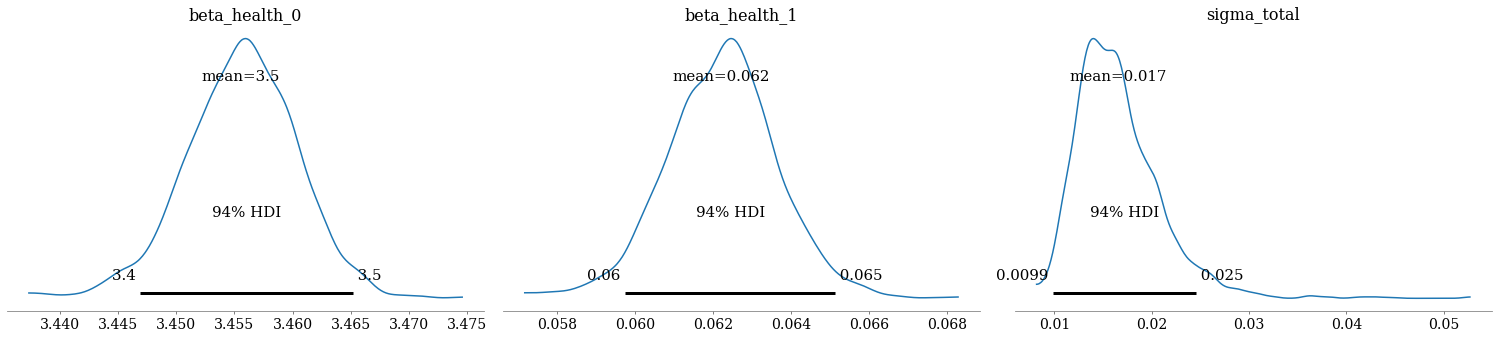

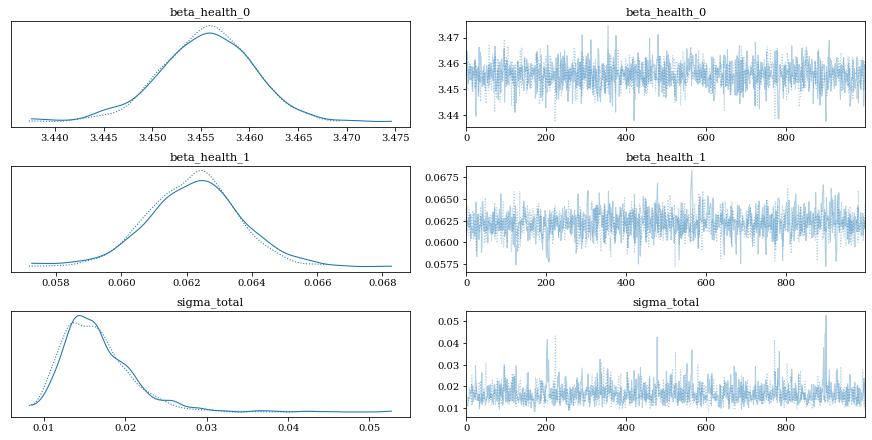

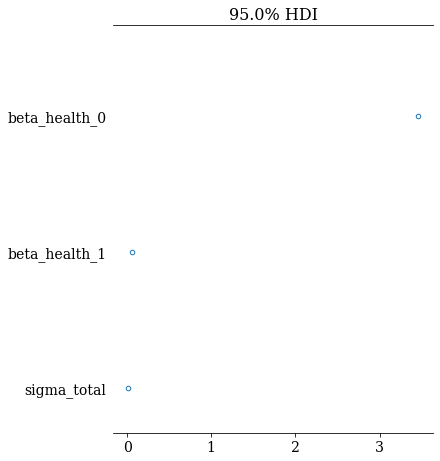

In [5]:
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt

data_health = data.iloc[26:-3,]
standard = 1_000
data_health = data_health / standard
start = 1906

with pm.Model() as model_health_council_orthodox:
    t = np.asarray(data_health.index)
    beta_health_0 = pm.Normal(
        "beta_health_0",
        mu=3,
        sigma=0.1,
    )
    beta_health_1 = pm.Normal(
        "beta_health_1",
        mu=0.05,
        sigma=0.01,
    )
    sigma_total = pm.HalfNormal(
        'sigma_total',
        sigma=0.1,
    )
    mu_health = beta_health_0 + beta_health_1 * (t - t.mean())
    health_council = pm.Normal(
        'health_council',
        mu=mu_health,
        sigma=sigma_total,
        observed=data_health.Seurakunta,
    )
    trace_health = pm.sample(1000, tune=2000, init="advi+adapt_diag")
    prior_health = pm.sample_prior_predictive()
    posterior_health = pm.sample()
    posterior_pred_health = pm.sample_posterior_predictive(posterior_health)

az.plot_posterior(posterior_health)
az.plot_trace(posterior_health)
az.plot_forest(posterior_health, combined=True, hdi_prob=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 11200
Interrupted at 11,199 [5%]: Average Loss = 1,534.3
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_total, beta_orthodox_1, beta_orthodox_0]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 14 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_total, beta_orthodox_1, beta_orthodox_0]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 15 seconds.


array([<AxesSubplot:title={'center':'95.0% HDI'}>], dtype=object)

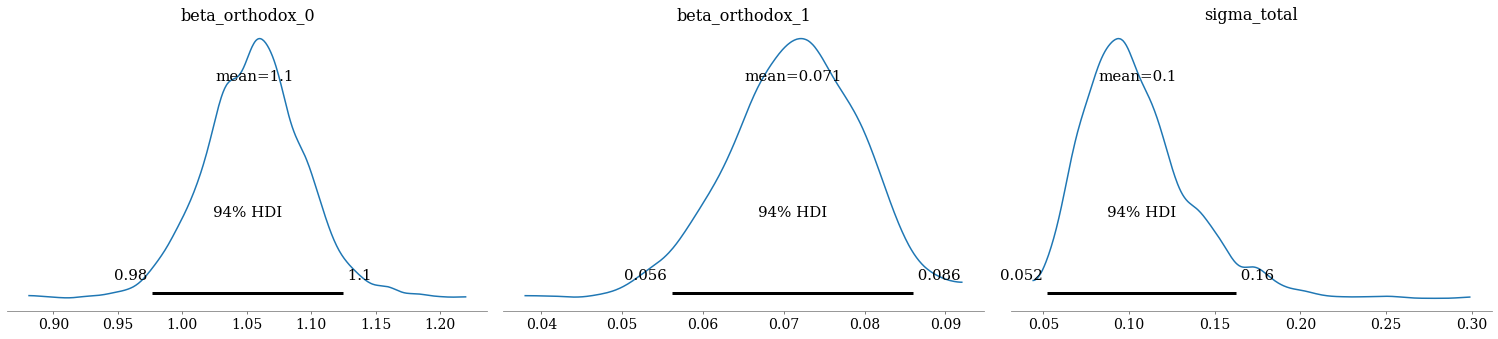

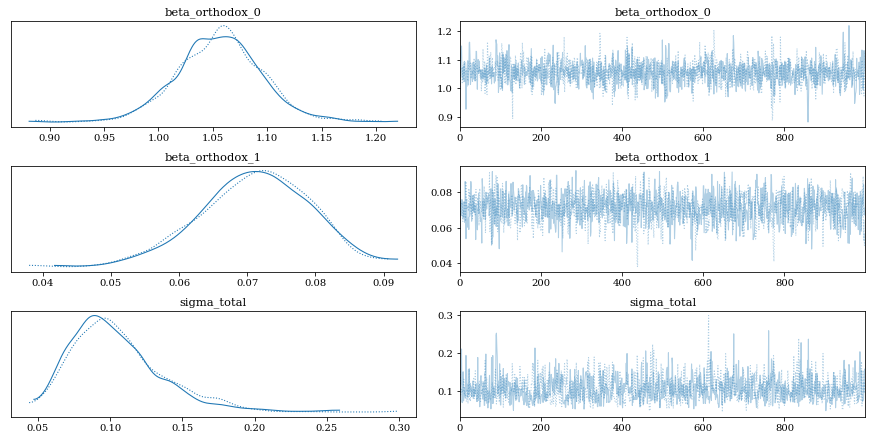

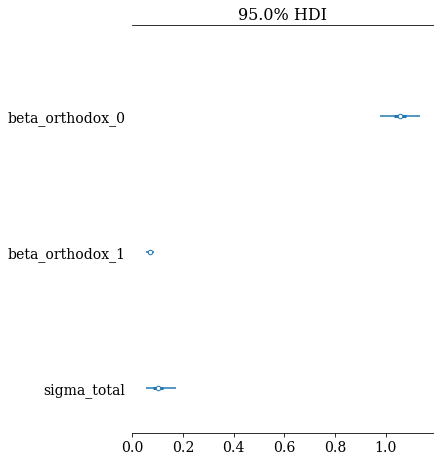

In [6]:
data_register = data_health.iloc[[0, 1, 2, 7, 8, 9,]]

mu_beta_orthodox_0 = 3.5 * 0.3
mu_beta_orthodox_1 = 0.062

with pm.Model() as model_register_orthodox:
    t = np.asarray(data_register.index)
    beta_orthodox_0 = pm.Normal(
        "beta_orthodox_0",
        mu=mu_beta_orthodox_0,
        sigma=0.1,
    )
    beta_orthodox_1 = pm.Normal(
        "beta_orthodox_1",
        mu=mu_beta_orthodox_1,
        sigma=0.01,
    )
    sigma_total = pm.HalfNormal(
        'sigma_total',
        sigma=0.1,
    )
    mu_total = beta_orthodox_0 + beta_orthodox_1 * (t - t.mean())
    total = pm.Normal(
        'register',
        mu=mu_total,
        sigma=sigma_total,
        observed=data_register.Kaupunki,
    )
    trace = pm.sample(1000, tune=2000, init="advi+adapt_diag")
    prior = pm.sample_prior_predictive()
    posterior = pm.sample()
    posterior_pred = pm.sample_posterior_predictive(posterior)

az.plot_posterior(posterior)
az.plot_trace(posterior)
az.plot_forest(posterior, combined=True, hdi_prob=0.95)

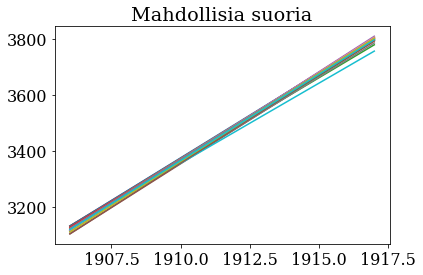

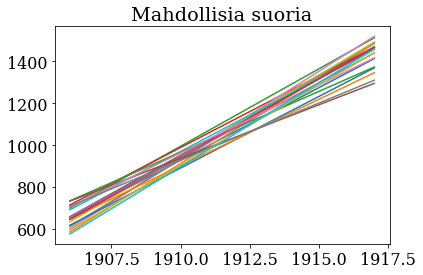

In [7]:
def plot_prediction(
        data,
        intercept_col,
        slope_col,
        standard,
        skip=100,
        start=1906,
        end=1918,
):
    year = np.arange(start, end, 1)
    intercept = data[intercept_col][::skip, ] * standard
    t = data[slope_col][::skip, ] * standard

    for sample in zip(intercept, t):
        total = sample[0] + sample[1] * (year - year.mean())
        plt.plot(year, total)
    plt.title(f'Mahdollisia suoria')
    plt.show()

# plot_prediction(
#     posterior_early,
#     intercept_col='beta_early_0',
#     slope_col='beta_early_1',
#     standard=standard,
#     start=1893,
#     end=start,
# )

plot_prediction(
    posterior_health,
    intercept_col='beta_health_0',
    slope_col='beta_health_1',
    standard=standard,
    start=start,
)

plot_prediction(
    posterior,
    intercept_col='beta_orthodox_0',
    slope_col='beta_orthodox_1',
    standard=standard,
    start=start,
)

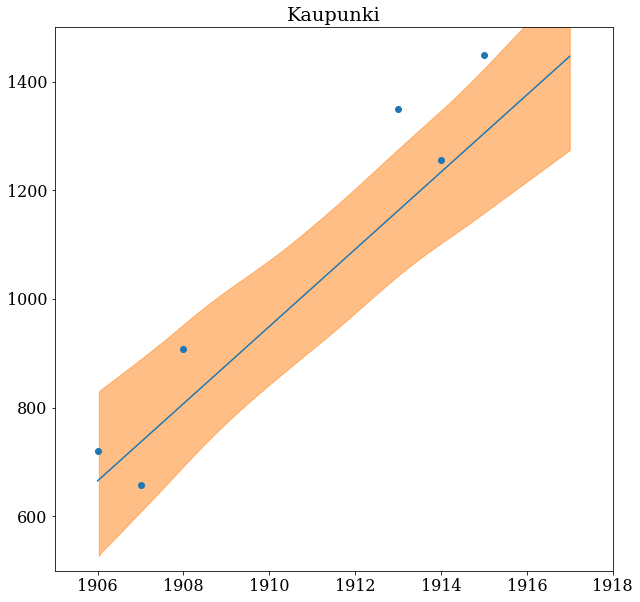

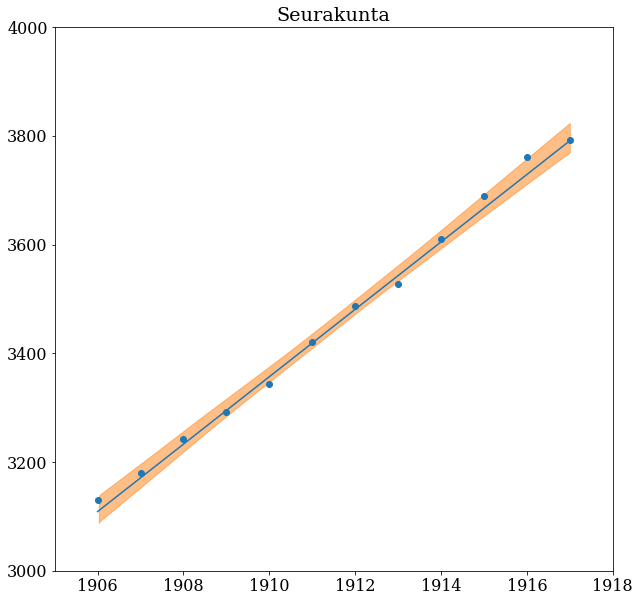

In [8]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

col_name = 'Kaupunki'
plt.figure(figsize=(10, 10))
x = np.arange(1906, 1918)
y = 1.056 + 0.071 * (x - x.mean())
idata = az.from_pymc3(trace=posterior, model=model_register_orthodox).to_dataframe()
beta_0 = idata[('posterior', 'beta_orthodox_0')]
beta_1 = idata[('posterior', 'beta_orthodox_1')]
mu_predicted = beta_0[..., np.newaxis] + beta_1[..., np.newaxis] * (x - x.mean())
az.plot_hdi(x, mu_predicted * standard, hdi_prob=0.99)
plt.plot(x, y * standard)
plt.scatter(data_register.index, data_register[col_name] * standard)
plt.xlim(1905, 1918)
plt.ylim(500, 1500)
plt.title(f'{col_name}')
plt.show()

col_name = 'Seurakunta'
plt.figure(figsize=(10, 10))
x = np.arange(1906, 1918)
y = 3.45 + 0.062 * (x - x.mean())
plt.plot(x, y * standard)
idata = az.from_pymc3(trace=posterior_health, model=model_health_council_orthodox).to_dataframe()
beta_0 = idata[('posterior', 'beta_health_0')]
beta_1 = idata[('posterior', 'beta_health_1')]
mu_predicted = beta_0[..., np.newaxis] + beta_1[..., np.newaxis] * (x - x.mean())
az.plot_hdi(x, mu_predicted * standard, hdi_prob=0.99)
plt.scatter(data_health.index, data_health.Seurakunta * standard)
plt.xlim(1905, 1918)
plt.ylim(3000, 4000)
plt.title(f'{col_name}')
plt.show()